# Scipy ndim

Image = 2-D numerical array

(or 3-D: CT, MRI, 2D + time; 4-D, …)

Here, image == Numpy array np.array

In [1]:
from scipy import ndimage

Common tasks in image processing:

- Input/Output, displaying images
- Basic manipulations: cropping, flipping, rotating, …
- Image filtering: denoising, sharpening
- Image segmentation: labeling pixels corresponding to different objects
- Classification
- Feature extraction
- Registration

## Opening and writing to image files

In [25]:
import numpy as np
from scipy import ndimage

/tmp/ipykernel_190978/2893878880.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face()


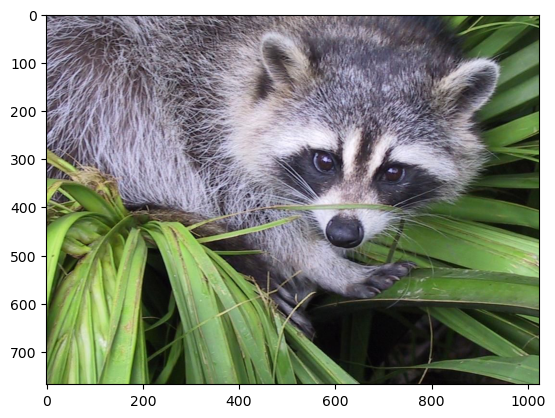

In [8]:
from scipy import misc
import imageio
f = misc.face()
imageio.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [1]:
from scipy import misc
import imageio
face = misc.face()
imageio.imsave('face.png', face) # First we need to create the PNG file

face = imageio.imread('face.png')
type(face)      

face.shape, face.dtype

/tmp/ipykernel_190978/346153602.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face()
/tmp/ipykernel_190978/346153602.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imageio.imread('face.png')


((768, 1024, 3), dtype('uint8'))

In [4]:
face.tofile('face.raw') # Create raw file
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

face_from_raw.shape = (768, 1024, 3)

In [5]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))


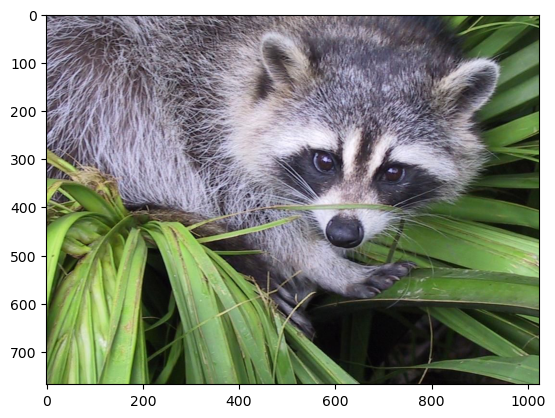

In [9]:
plt.imshow(face_memmap)

(data are read from the file, and not loaded into memory)



Working on a list of image files

In [ ]:
for i in range(10):
    im = np.random.randint(0, 256, 10000).reshape((100, 100))
    imageio.imsave('random_%02d.png' % i, im)
from glob import glob
filelist = glob('random*.png')
filelist.sort()

In [ ]:
filelist

## Displaying images
Use matplotlib and imshow to display an image inside a matplotlib figure:



/tmp/ipykernel_190978/2744220184.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face(gray=True)  # retrieve a grayscale image


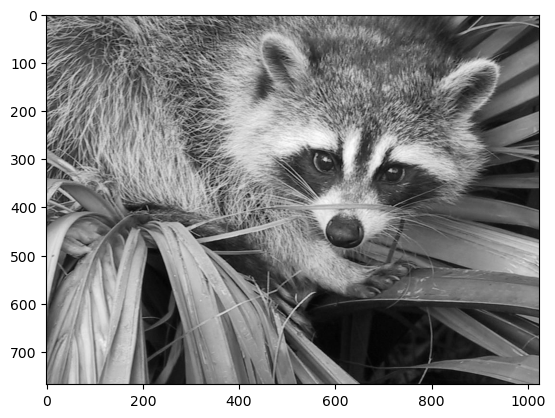

In [15]:
f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)  

Increase contrast by setting min and max values:



(-0.5, 1023.5, 767.5, -0.5)

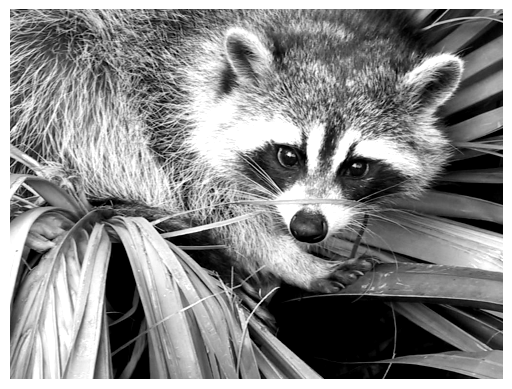

In [16]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')

Draw contour lines:



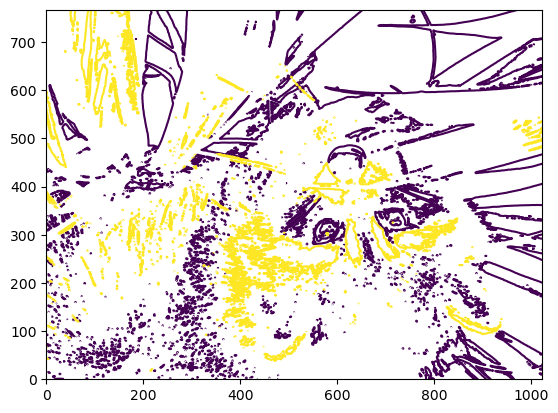

In [17]:
plt.contour(f, [50, 200]) 

For smooth intensity variations, use interpolation='bilinear'. For fine inspection of intensity variations, use interpolation='nearest':

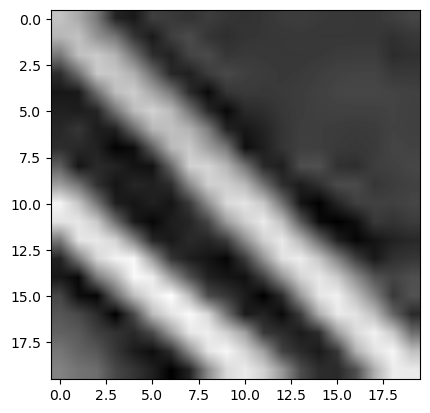

In [18]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')

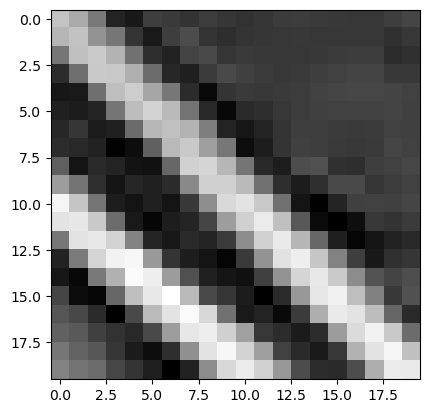

In [19]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')

## Basic manipulations

Images are arrays: use the whole numpy machinery.



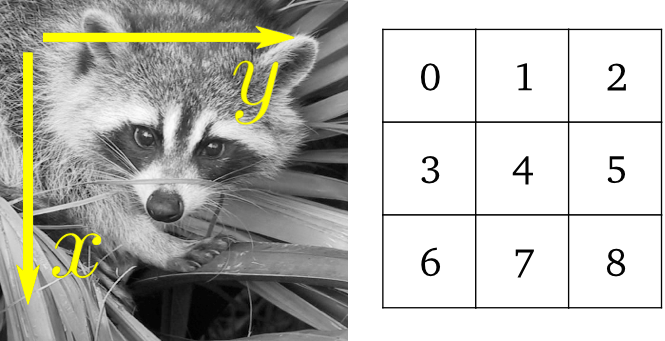

## Statistical information

In [23]:
face = misc.face(gray=True)
face.mean()

face.max(), face.min()


/tmp/ipykernel_190978/1328934378.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


(250, 0)

## Image filtering

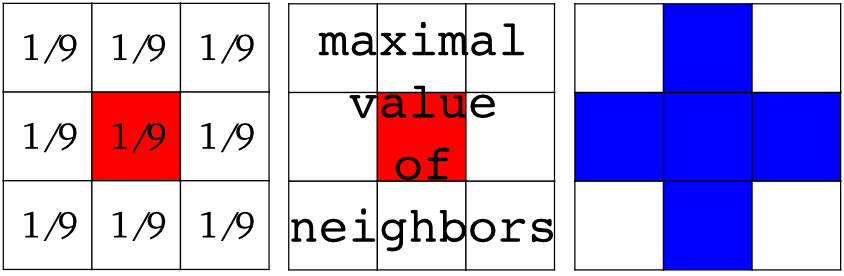

### Blurring/smoothing

Gaussian filter

In [29]:
from scipy import misc
face = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)

/tmp/ipykernel_190978/294532833.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


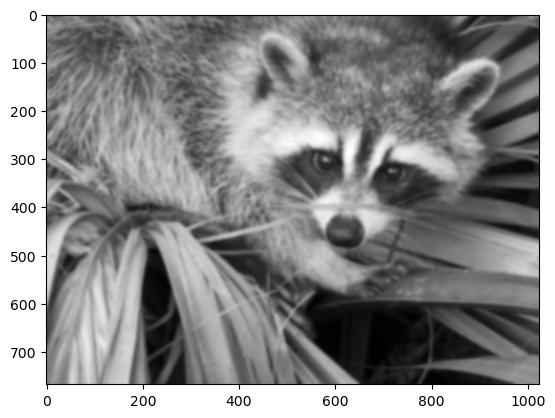

In [31]:
plt.imshow(blurred_face, cmap=plt.cm.gray)

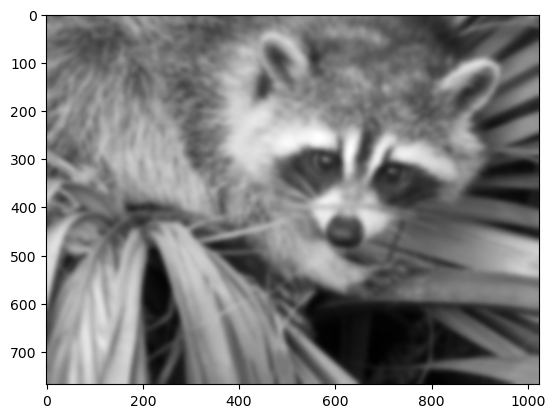

In [32]:
plt.imshow(very_blurred, cmap=plt.cm.gray)

In [33]:
local_mean = ndimage.uniform_filter(face, size=11)

Uniform filter

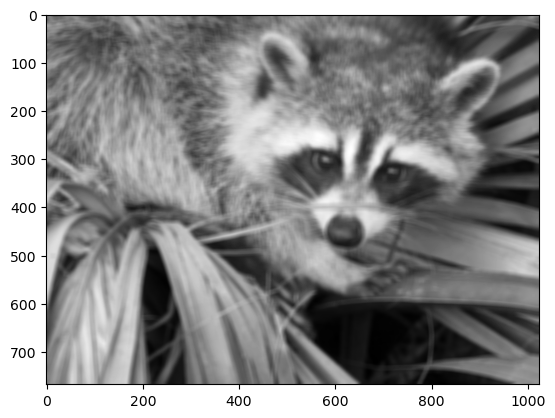

In [34]:
plt.imshow(local_mean, cmap=plt.cm.gray)

## Image Segmentation

Histogram-based segmentation (no spatial information)


/tmp/ipykernel_190978/1368921591.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
/tmp/ipykernel_190978/1368921591.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#de

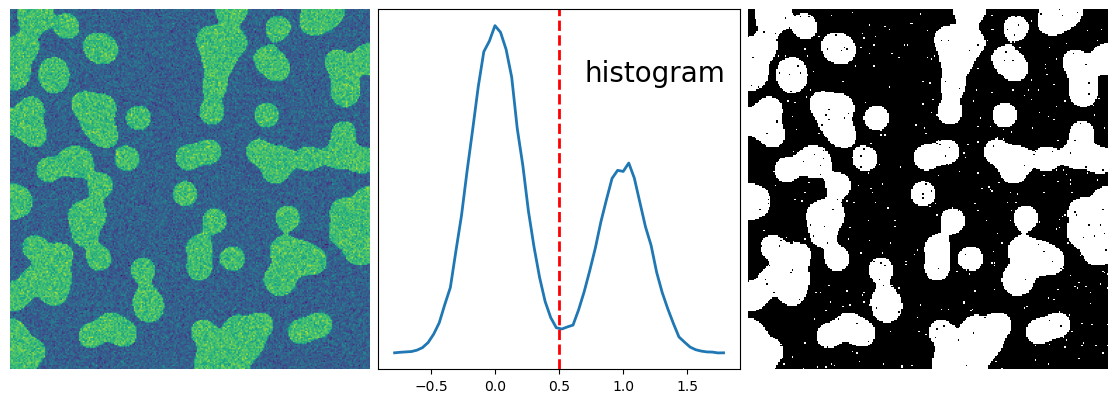

In [40]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)

mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5

plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

Use mathematical morphology to clean up the result:



In [41]:
# Remove small white regions
open_img = ndimage.binary_opening(binary_img)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)

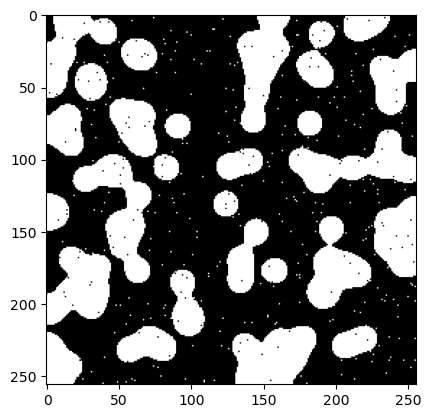

In [44]:
plt.imshow(binary_img, cmap=plt.cm.gray)

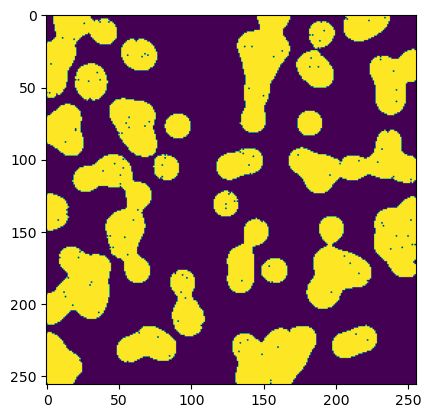

In [42]:
plt.imshow(open_img)

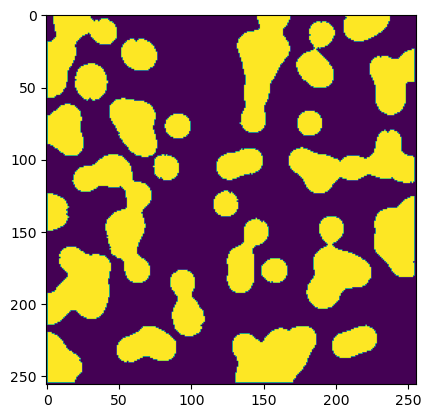

In [43]:
plt.imshow(close_img)

## Percolation

/tmp/ipykernel_251650/1947147063.py:16: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  lw, num = measurements.label(z)
/tmp/ipykernel_251650/1947147063.py:27: DeprecationWarning: Please use `sum` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  area = measurements.sum(z, lw, index=arange(lw.max() + 1))
/tmp/ipykernel_251650/1947147063.py:34: DeprecationWarning: Please use `find_objects` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  sliced = measurements.find_objects(areaImg == areaImg.max())


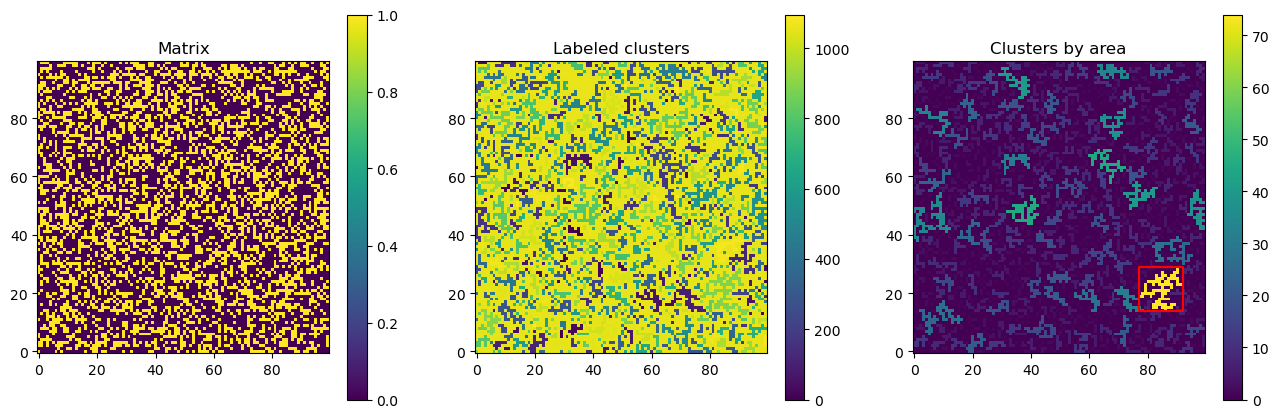

In [1]:
from pylab import *
from scipy.ndimage import measurements

L = 100
r = rand(L,L)
p = 0.4
z = r<p

figure(figsize=(16,5))
subplot(1,3,1)
imshow(z, origin='lower', interpolation='nearest')
colorbar()
title("Matrix")

# Show image of labeled clusters (shuffled)
lw, num = measurements.label(z)
subplot(1,3,2)
b = arange(lw.max() + 1) # create an array of values from 0 to lw.max() + 1
shuffle(b) # shuffle this array
shuffledLw = b[lw] # replace all values with values from b
imshow(shuffledLw, origin='lower', interpolation='nearest') # show image clusters as labeled by a shuffled lw
colorbar()
title("Labeled clusters")

# Calculate areas
subplot(1,3,3)
area = measurements.sum(z, lw, index=arange(lw.max() + 1))
areaImg = area[lw]
im3 = imshow(areaImg, origin='lower', interpolation='nearest')
colorbar()
title("Clusters by area")

# Bounding box
sliced = measurements.find_objects(areaImg == areaImg.max())
if(len(sliced) > 0):
    sliceX = sliced[0][1]
    sliceY = sliced[0][0]
    plotxlim=im3.axes.get_xlim()
    plotylim=im3.axes.get_ylim()
    plot([sliceX.start, sliceX.start, sliceX.stop, sliceX.stop, sliceX.start],
                     [sliceY.start, sliceY.stop, sliceY.stop, sliceY.start, sliceY.start],
                     color="red")
    xlim(plotxlim)
    ylim(plotylim)

show()